In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [7]:
df = pd.read_csv('Invistico_Airline.csv')

In [89]:
df.head(10)

,satisfaction,Gender,Customer_Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival_Delay_in_Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0


In [9]:
df.shape

(129880, 23)

In [10]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [11]:
import seaborn as sns

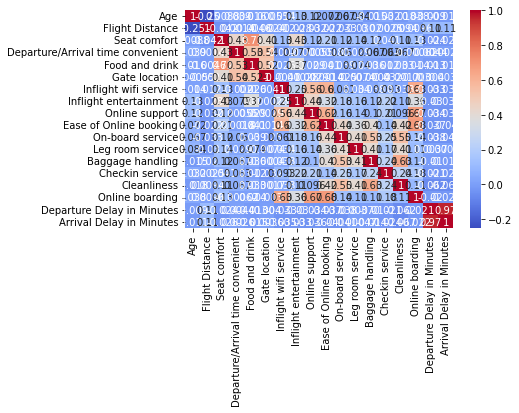

In [12]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [14]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [16]:
df.rename(columns={'Arrival Delay in Minutes': 'Arrival_Delay_in_Minutes'}, inplace=True)

In [17]:
df['Arrival_Delay_in_Minutes'].fillna(df['Arrival_Delay_in_Minutes'].median(), inplace=True)

In [18]:
df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival_Delay_in_Minutes             0
dtype: int64

In [34]:
df.rename(columns={'Customer Type': 'Customer_Type'}, inplace=True)

In [35]:
x = df.drop(['satisfaction','Type of Travel'], axis = 1)

In [36]:
y = df['satisfaction']

In [37]:
from sklearn.preprocessing import LabelEncoder
le_x= LabelEncoder()
x.Gender = le_x.fit_transform(x.Gender)
x.Class	 = le_x.fit_transform(x.Class)
x.Customer_Type	 = le_x.fit_transform(x.Customer_Type)

In [38]:
x

,Gender,Customer_Type,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival_Delay_in_Minutes
0,0,0,65,1,265,0,0,0,2,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,0,47,0,2464,0,0,0,3,0,...,2,3,4,4,4,2,3,2,310,305.0
2,0,0,15,1,2138,0,0,0,3,2,...,2,2,3,3,4,4,4,2,0,0.0
3,0,0,60,1,623,0,0,0,3,3,...,3,1,1,0,1,4,1,3,0,0.0
4,0,0,70,1,354,0,0,0,3,4,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,1,29,1,1731,5,5,5,3,2,...,2,2,3,3,4,4,4,2,0,0.0
129876,1,1,63,0,2087,2,3,2,4,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,1,1,69,1,2320,3,0,3,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,1,1,66,1,2450,3,2,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [79]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.3,random_state=1)

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
reg = LogisticRegression()
reg.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [82]:
prediction = reg.predict(xtest)

In [83]:
prediction

array(['dissatisfied', 'satisfied', 'dissatisfied', ..., 'satisfied',
       'satisfied', 'dissatisfied'], dtype=object)

In [84]:
reg.score(xtest,ytest)

0.7888050508161379

In [85]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

dissatisfied       0.81      0.70      0.75     17700
   satisfied       0.78      0.86      0.82     21264

    accuracy                           0.79     38964
   macro avg       0.79      0.78      0.78     38964
weighted avg       0.79      0.79      0.79     38964



In [87]:
from sklearn.metrics import  confusion_matrix

In [88]:
print(confusion_matrix(ytest, prediction))

[[12462  5238]
 [ 2991 18273]]
